In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitudes and longitudes.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [108]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | bar harbor
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | mosquera
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | turukhansk
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | jacareacanga
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | barentu
Processing Record 18 of Set 1 | poya
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | ormara
Processing Record 21 of Set 1 | vulcan
Processing Record 22 of Set 1 | mataura
Processing Record 23 o

Processing Record 40 of Set 4 | tocache
Processing Record 41 of Set 4 | kariba
Processing Record 42 of Set 4 | eydhafushi
Processing Record 43 of Set 4 | bilma
Processing Record 44 of Set 4 | zaterechnyy
Processing Record 45 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 46 of Set 4 | mana
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | bollnas
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | bulungu
Processing Record 3 of Set 5 | longlac
City not found. Skipping...
Processing Record 4 of Set 5 | guarapari
Processing Record 5 of Set 5 | cabaiguan
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | coihaique
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | amot
Processing Record 11 of Set 5 | jeremie
Processing Record 

Processing Record 30 of Set 8 | vostok
Processing Record 31 of Set 8 | elat
Processing Record 32 of Set 8 | sangar
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | dhanwar
Processing Record 35 of Set 8 | the pas
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | key west
Processing Record 40 of Set 8 | burayevo
Processing Record 41 of Set 8 | ca mau
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | fairbanks
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | necochea
Processing Record 46 of Set 8 | cary
Processing Record 47 of Set 8 | moussoro
Processing Record 48 of Set 8 | hamilton
Processing Record 49 of Set 8 | ambon
Processing Record 50 of Set 8 | pocone
Processing Record 1 of Set 9 | nome
Processing Record 2 of Set 9 | porto walter
Processing Record 3 of Set 9 | karmana
City not found. Skipping...
Processing Record 4 

Processing Record 18 of Set 12 | praia da vitoria
Processing Record 19 of Set 12 | fereydun kenar
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | sulzbach-rosenberg
Processing Record 22 of Set 12 | jizan
Processing Record 23 of Set 12 | teya
Processing Record 24 of Set 12 | hongjiang
Processing Record 25 of Set 12 | rosa zarate
Processing Record 26 of Set 12 | satitoa
City not found. Skipping...
Processing Record 27 of Set 12 | atasu
Processing Record 28 of Set 12 | maniitsoq
Processing Record 29 of Set 12 | rungata
City not found. Skipping...
Processing Record 30 of Set 12 | svetlogorsk
Processing Record 31 of Set 12 | mendeleyevo
Processing Record 32 of Set 12 | suchilquitongo
City not found. Skipping...
Processing Record 33 of Set 12 | tucurui
Processing Record 34 of Set 12 | helena
Processing Record 35 of Set 12 | samusu
City not found. Skipping...
Processing Record 36 of Set 12 | flinders
Processing Record 37 of Set 12 | berdigestyakh
Processing Rec

In [77]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nishihara,26.1842,127.7558,78.85,86,40,5.75,JP,2022-10-01 18:44:37
1,Saint-Philippe,-21.3585,55.7679,67.59,78,44,11.72,RE,2022-10-01 18:44:38
2,Bar Harbor,44.3876,-68.2039,62.53,72,0,6.91,US,2022-10-01 18:44:39
3,La Ronge,55.1001,-105.2842,52.05,71,20,8.05,CA,2022-10-01 18:44:39
4,Lorengau,-2.0226,147.2712,80.94,79,21,10.07,PG,2022-10-01 18:44:40
5,Mosquera,4.7059,-74.2302,62.69,59,75,21.85,CO,2022-10-01 18:43:00
6,Nuuk,64.1835,-51.7216,36.21,93,75,8.05,GL,2022-10-01 18:44:40
7,Rikitea,-23.1203,-134.9692,73.60,73,34,12.80,PF,2022-10-01 18:44:40
8,Thompson,55.7435,-97.8558,48.36,46,0,6.91,CA,2022-10-01 18:44:40
9,Turukhansk,65.8167,87.9833,29.79,80,100,6.44,RU,2022-10-01 18:44:41


In [78]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2022-10-01 18:44:37,26.1842,127.7558,78.85,86,40,5.75
1,Saint-Philippe,RE,2022-10-01 18:44:38,-21.3585,55.7679,67.59,78,44,11.72
2,Bar Harbor,US,2022-10-01 18:44:39,44.3876,-68.2039,62.53,72,0,6.91
3,La Ronge,CA,2022-10-01 18:44:39,55.1001,-105.2842,52.05,71,20,8.05
4,Lorengau,PG,2022-10-01 18:44:40,-2.0226,147.2712,80.94,79,21,10.07
5,Mosquera,CO,2022-10-01 18:43:00,4.7059,-74.2302,62.69,59,75,21.85
6,Nuuk,GL,2022-10-01 18:44:40,64.1835,-51.7216,36.21,93,75,8.05
7,Rikitea,PF,2022-10-01 18:44:40,-23.1203,-134.9692,73.60,73,34,12.80
8,Thompson,CA,2022-10-01 18:44:40,55.7435,-97.8558,48.36,46,0,6.91
9,Turukhansk,RU,2022-10-01 18:44:41,65.8167,87.9833,29.79,80,100,6.44


In [79]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [80]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

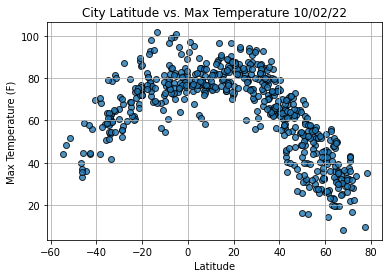

In [81]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

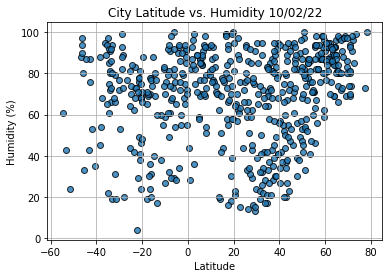

In [82]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


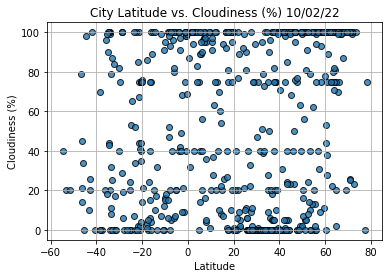

In [83]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

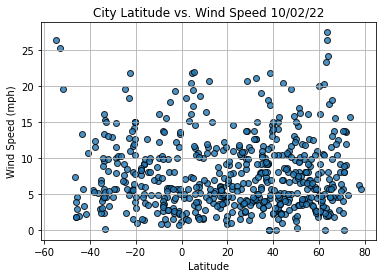

In [84]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [86]:
#Extract information of Index 13 from DataFrame.
index13 = city_data_df.loc[13]
index13

City                 Kruisfontein
Country                        ZA
Date          2022-10-01 18:44:41
Lat                      -34.0033
Lng                       24.7314
Max Temp                    58.89
Humidity                       80
Cloudiness                     99
Wind Speed                   2.37
Name: 13, dtype: object

In [87]:
#Filtering the DataFrame.
city_data_df['Lat'] >= 0


0       True
1      False
2       True
3       True
4      False
       ...  
566    False
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [88]:
#Returning a DataFrame.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2022-10-01 18:44:37,26.1842,127.7558,78.85,86,40,5.75
2,Bar Harbor,US,2022-10-01 18:44:39,44.3876,-68.2039,62.53,72,0,6.91
3,La Ronge,CA,2022-10-01 18:44:39,55.1001,-105.2842,52.05,71,20,8.05
5,Mosquera,CO,2022-10-01 18:43:00,4.7059,-74.2302,62.69,59,75,21.85
6,Nuuk,GL,2022-10-01 18:44:40,64.1835,-51.7216,36.21,93,75,8.05


In [89]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


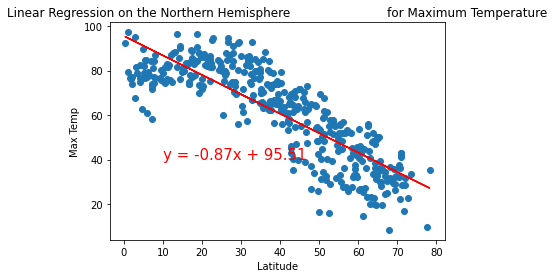

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,40))


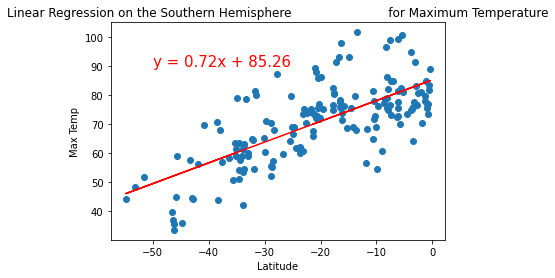

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", "Max Temp",(-50,90))

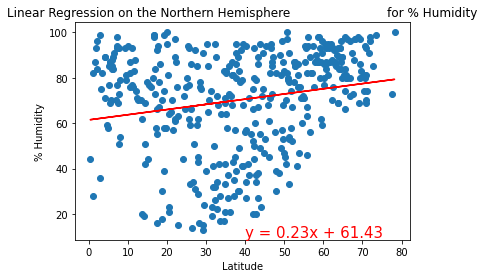

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

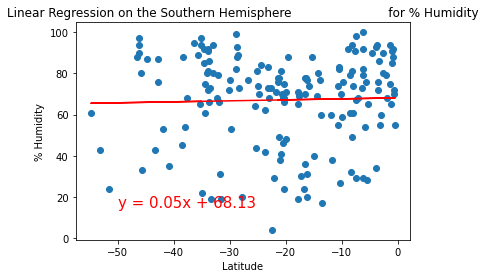

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

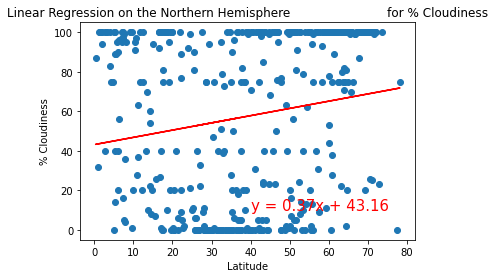

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

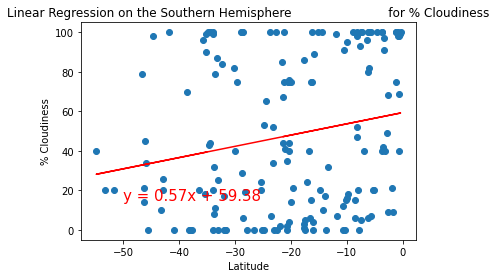

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))


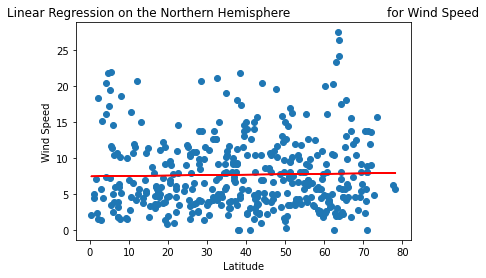

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

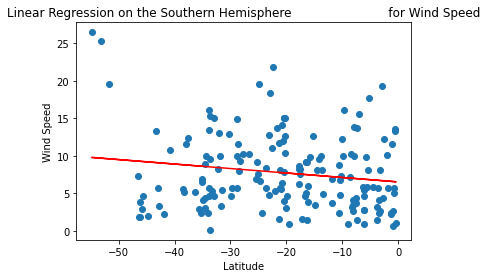

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
!git a